<a href="https://colab.research.google.com/github/DajanaSanchez/BirdMigrationClimateAnalysis/blob/main/Captone_Bird_20250131.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:
%cd '/content/drive/MyDrive/Colab Notebooks/IT Capstone'

%ls -ltra ebd*


/content/drive/MyDrive/Colab Notebooks/IT Capstone
-rw------- 1 root root     258577 Jan 31 14:48 ebd_MX_baleag_197401_202412_smp_relDec-2024.txt
-rw------- 1 root root  536615587 Jan 31 14:58 ebd_CA_baleag_197401_202412_smp_relDec-2024.txt
-rw------- 1 root root 2391475932 Jan 31 15:48 ebd_US_baleag_197401_202412_smp_relDec-2024.txt


In [3]:
dtype_dict = {
    'GLOBAL UNIQUE IDENTIFIER': 'str',
    'TAXONOMIC ORDER': 'str',
    'CATEGORY': 'str',
    'TAXON CONCEPT ID': 'str',
    'COMMON NAME': 'str',
    'SCIENTIFIC NAME': 'str',
    'SUBSPECIES COMMON NAME': 'str',
    'SUBSPECIES SCIENTIFIC NAME': 'str',
    'EXOTIC CODE': 'str',
    'OBSERVATION COUNT': 'str',
    'BREEDING CODE': 'str',
    'BREEDING CATEGORY': 'str',
    'BEHAVIOR CODE': 'str',
    'AGE/SEX': 'str',
    'COUNTRY': 'str',
    'COUNTRY CODE': 'str',
    'STATE': 'str',
    'STATE CODE': 'str',
    'COUNTY': 'str',
    'COUNTY CODE': 'str',
    'IBA CODE': 'str',
    'BCR CODE': 'str',
    'USFWS CODE': 'str',
    'ATLAS BLOCK': 'str',
    'LOCALITY': 'str',
    'LOCALITY ID': 'str',
    'LOCALITY TYPE': 'str',
    'LATITUDE': 'str',
    'LONGITUDE': 'str',
    'OBSERVATION DATE': 'str',
    'TIME OBSERVATIONS STARTED': 'str',
    'OBSERVER ID': 'str',
    'SAMPLING EVENT IDENTIFIER': 'str',
    'PROTOCOL TYPE': 'str',
    'PROTOCOL CODE': 'str',
    'PROJECT CODE': 'str',
    'DURATION MINUTES': 'str',
    'EFFORT DISTANCE KM': 'str',
    'EFFORT AREA HA': 'str',
    'NUMBER OBSERVERS': 'str',
    'ALL SPECIES REPORTED': 'str',
    'GROUP IDENTIFIER': 'str',
    'HAS MEDIA': 'str',
    'APPROVED': 'str',
    'REVIEWED': 'str',
    'REASON': 'str',
    'TRIP COMMENTS': 'str',
    'SPECIES COMMENTS': 'str'
}

In [4]:
!pip install geopandas
!pip install pandas
!pip install matplotlib
!pip install datetime
!pip install geopandas
!pip install contextily

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.6/323.6 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 59.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 95.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 55.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.8/259.8 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.4/125.4 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 85.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 2.3 MB/s eta 0:00:00


In [6]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from datetime import datetime

# List of file paths
file_paths = [
    "ebd_MX_baleag_197401_202412_smp_relDec-2024.txt",
    "ebd_CA_baleag_197401_202412_smp_relDec-2024.txt",
    "ebd_US_baleag_197401_202412_smp_relDec-2024.txt"
]

# Read and combine all files into a single DataFrame
checklists_list = []
for file in file_paths:
    try:
        df = pd.read_csv(
            file,
            sep='\t',  # Tab-delimited
            low_memory=False,
            on_bad_lines='warn'  # Print warnings for bad lines
        )
        checklists_list.append(df)
    except Exception as e:
        print(f"Error reading {file}: {e}")

# Concatenate all DataFrames
checklists = pd.concat(checklists_list, ignore_index=True)

# Display structure of the combined data
print(checklists.info())
print(checklists.head())

# Define the output Parquet file path
output_file = "combined_checklists.parquet"

# Write the combined DataFrame to a Parquet file
checklists.to_parquet(output_file, engine='pyarrow', index=False)

# Confirm the file was written
print(f"Parquet file saved as {output_file}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7498843 entries, 0 to 7498842
Data columns (total 50 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   GLOBAL UNIQUE IDENTIFIER    object 
 1   LAST EDITED DATE            object 
 2   TAXONOMIC ORDER             int64  
 3   CATEGORY                    object 
 4   TAXON CONCEPT ID            object 
 5   COMMON NAME                 object 
 6   SCIENTIFIC NAME             object 
 7   SUBSPECIES COMMON NAME      float64
 8   SUBSPECIES SCIENTIFIC NAME  float64
 9   EXOTIC CODE                 object 
 10  OBSERVATION COUNT           object 
 11  BREEDING CODE               object 
 12  BREEDING CATEGORY           object 
 13  BEHAVIOR CODE               object 
 14  AGE/SEX                     object 
 15  COUNTRY                     object 
 16  COUNTRY CODE                object 
 17  STATE                       object 
 18  STATE CODE                  object 
 19  COUNTY               

In [7]:
# Identify the date column (replace 'DATE_COLUMN' with the actual column name)
date_column = 'OBSERVATION DATE'  # Update with the correct column name

# Convert to datetime
checklists[date_column] = pd.to_datetime(checklists[date_column], errors='coerce')

# Find the oldest and newest date
oldest_date = checklists[date_column].min()
newest_date = checklists[date_column].max()

print(f"Oldest date: {oldest_date}")
print(f"Newest date: {newest_date}")

# Find the most common date
most_common_date = checklists[date_column].mode()[0]

# Count occurrences of the most common date
most_common_date_count = (checklists[date_column] == most_common_date).sum()

# Get total record count
total_records = len(checklists)

print(f"Most common date: {most_common_date} (occurs {most_common_date_count} times)")
print(f"Total record count: {total_records}")




Oldest date: 1974-01-01 00:00:00
Newest date: 2024-12-31 00:00:00
Most common date: 2024-05-11 00:00:00 (occurs 10646 times)
Total record count: 7498843


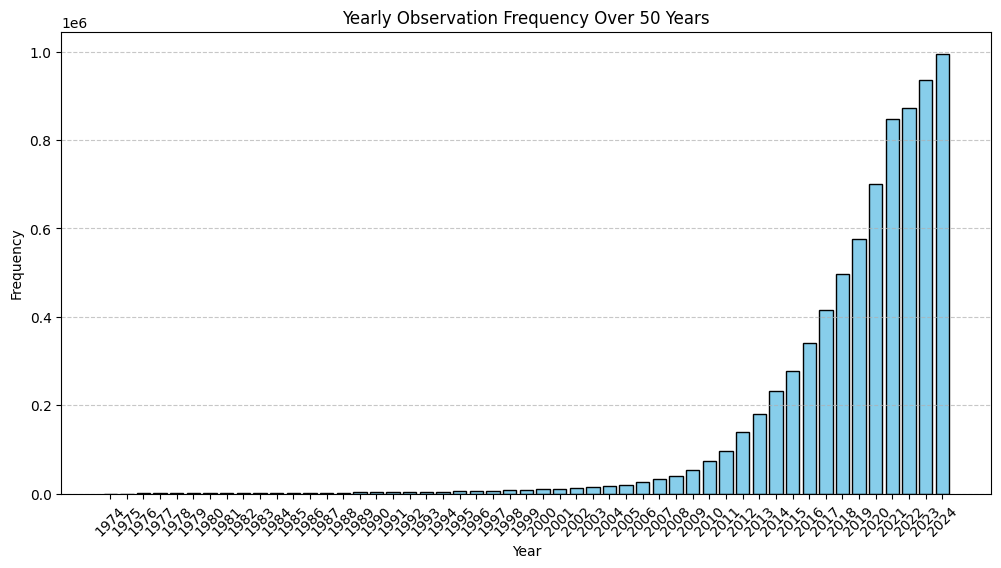

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Drop NaN values in the date column
checklists = checklists.dropna(subset=[date_column])

# Group by year and count occurrences
checklists['Year'] = checklists[date_column].dt.year
yearly_counts = checklists['Year'].value_counts().sort_index()

# Plot
plt.figure(figsize=(12, 6))
plt.bar(yearly_counts.index.astype(str), yearly_counts.values, color='skyblue', edgecolor='black')

# Formatting
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Yearly Observation Frequency Over 50 Years')
plt.xticks(rotation=45)  # Slight rotation for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()



In [17]:
import pandas as pd

# Define the file path in Google Drive
file_path = "/content/drive/MyDrive/Colab Notebooks/IT Capstone/checklists_big.parquet"

# Read the Parquet file into a DataFrame
checklists = pd.read_parquet(file_path, engine='pyarrow')

# Verify the DataFrame loaded correctly
print(checklists.head())



             LAST EDITED DATE        COUNTRY COUNTRY CODE       STATE  \
0  2023-08-31 18:19:08.051732  United States           US  California   
1  2023-08-31 20:38:35.369615  United States           US  California   
2  2023-08-31 19:39:17.072732  United States           US  California   
3  2024-01-03 18:07:19.976755  United States           US  California   
4  2023-12-02 17:46:24.277349  United States           US        Ohio   

  STATE CODE   COUNTY COUNTY CODE IBA CODE  BCR CODE USFWS CODE  ...  \
0      US-CA  Ventura   US-CA-111     None      32.0       None  ...   
1      US-CA  Ventura   US-CA-111     None      32.0       None  ...   
2      US-CA  Ventura   US-CA-111     None      32.0       None  ...   
3      US-CA  Ventura   US-CA-111     None      32.0       None  ...   
4      US-OH     Knox   US-OH-083     None      13.0       None  ...   

  DURATION MINUTES EFFORT DISTANCE KM EFFORT AREA HA NUMBER OBSERVERS  \
0              4.0                NaN            NaN   

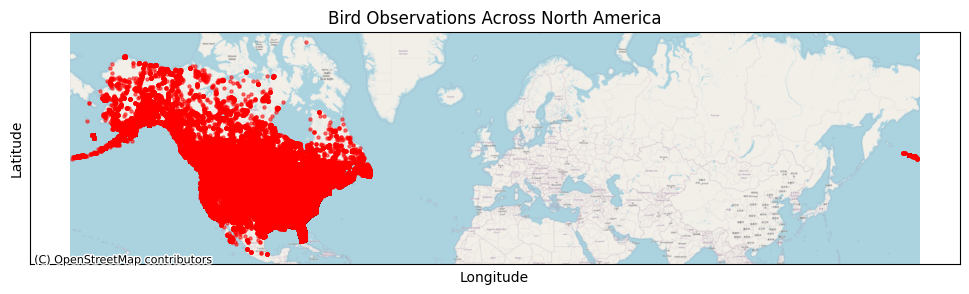

In [9]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

# Drop rows with missing latitude or longitude values
checklists = checklists.dropna(subset=['LATITUDE', 'LONGITUDE'])

# Convert to a GeoDataFrame
gdf = gpd.GeoDataFrame(
    checklists,
    geometry=gpd.points_from_xy(checklists['LONGITUDE'], checklists['LATITUDE']),
    crs="EPSG:4326"  # WGS84 coordinate system
)

# Convert CRS to Web Mercator for basemap compatibility
gdf = gdf.to_crs(epsg=3857)

# Plot with a basemap
fig, ax = plt.subplots(figsize=(12, 8))

# Plot bird observation points
gdf.plot(ax=ax, markersize=5, color='red', alpha=0.5)

# Add a basemap of North America - using Openstreetmap instead of Stamen
# Stamen provider might have changed, causing the AttributeError.
# Update to a valid provider or use a different basemap source.
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, zoom=4)

# Formatting
ax.set_title("Bird Observations Across North America")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_xticks([])
ax.set_yticks([])

plt.show()

In [10]:
# Select required columns and reformat date
sabina = checklists[["LATITUDE", "LONGITUDE", "OBSERVATION DATE"]].copy()
sabina["OBSERVATION DATE"] = pd.to_datetime(sabina["OBSERVATION DATE"]).dt.strftime('%Y-%m')

# Display structure of the transformed data
print(sabina.info())
print(sabina.head())

# Define the output Parquet file path
output_file_sabina = "sabina.parquet"

# Write the transformed DataFrame to a Parquet file
sabina.to_parquet(output_file_sabina, engine='pyarrow', index=False)

# Confirm the file was written
print(f"Parquet file saved as {output_file_sabina}")


<class 'pandas.core.frame.DataFrame'>
Index: 7498836 entries, 0 to 7498842
Data columns (total 3 columns):
 #   Column            Dtype  
---  ------            -----  
 0   LATITUDE          float64
 1   LONGITUDE         float64
 2   OBSERVATION DATE  object 
dtypes: float64(2), object(1)
memory usage: 228.8+ MB
None
    LATITUDE   LONGITUDE OBSERVATION DATE
0  32.045333 -115.908508          1995-11
1  30.409449 -115.945759          1998-03
2  30.409449 -115.945759          1998-03
3  30.409449 -115.945759          1998-03
4  30.409449 -115.945759          1998-03
Parquet file saved as sabina.parquet


In [11]:
# Define the Google Drive path
output_file_sabina = "/content/drive/MyDrive/Colab Notebooks/IT Capstone/sabina.parquet"

# Write the DataFrame to a Parquet file
checklists.to_parquet(output_file, engine='pyarrow', index=False)

print(f"Parquet file saved at: {output_file}")


Parquet file saved at: combined_checklists.parquet
